<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/%08SVM(%EB%B9%84%EC%84%A0%ED%98%95)02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import library


In [36]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [37]:
#sklearn에서 제공하는 iris호출
iris=datasets.load_iris()

#sklearn에서 제공하는 model_selection 패키지에서 제공하는 train_test_split() 메서드를 활용
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3, random_state=42)


# train_test_split으로 훈련 데이터와 테스터 데이터를 나눈 것을 확인하기 위해 shape을 해본다.
#X_train.shape #(105, 4)
#X_test.shape #(45, 4)
#y_train.shape #(105,)
y_test.shape #(45,)

(45,)

### SVM 모델 생성 및 학습(RBF 커널 사용-다중)


In [38]:
#SVM model accuracy
#svm=svm.SVC(kernel='linear',C=1.0,gamma=0.5)
#svm.fit(X_train,y_train)

model=svm.SVC(kernel='rbf',gamma='scale')       #kernel='linear':선형 커널을 사용하여 데이터를 분류, 3D='RBF'



model.fit(X_train,y_train) #훈련 데이터를 사용하여 svm 분류기를 훈련


#테스트 데이터로 예측
y_pred=model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


### 모델 성능 평가

In [39]:
print('Accuracy:',accuracy_score(y_test,y_pred)) # 위에서 이미 import를 해주었기때문에 metrics.accuracy_score부터 쓰지 않아도 됨
print("classification_report :₩n`",classification_report(y_test,y_pred))


Accuracy: 1.0
classification_report :₩n`               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 학습 데이터와 Decision boundary Visualization(결정경계시각화)

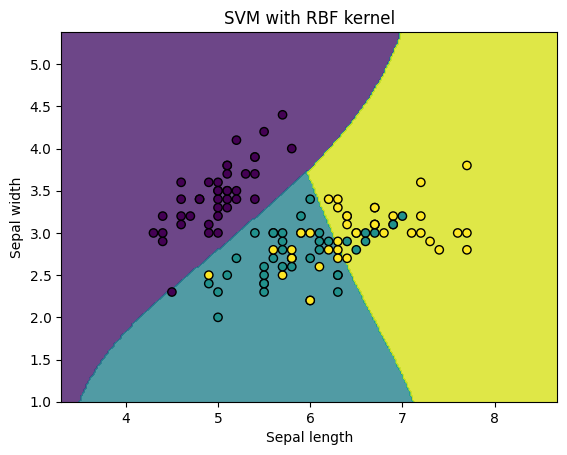

In [41]:
def plot_decision_boundary(X,y,model):
  h=0.02 #결정경계의 해상도
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,alpha=0.8)
  plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k', marker='o')
  plt.title('SVM with RBF kernel')
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.show()

  #결정경계 시각화
  plot_decision_boundary(X_train,y_train,model)

### 위 코드 정리

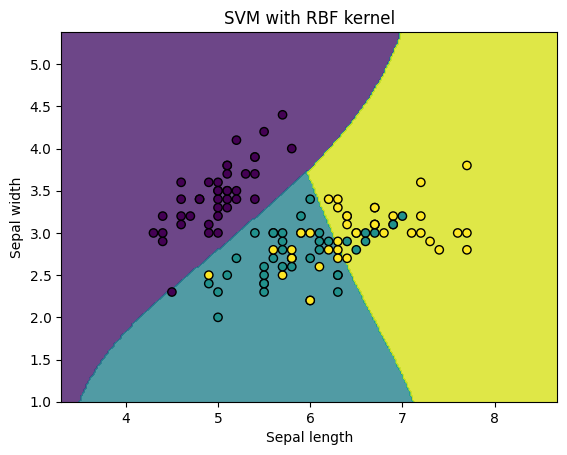

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성 및 학습 (RBF 커널)
model = SVC(kernel='rbf', C=1.0, gamma=0.5)
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.02  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM with RBF kernel')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)
